# Inference: Hamiltonian MCMC

This example shows you how to perform Bayesian inference on a time series, using [Hamiltonian Monte Carlo](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

Running...
Using Hamiltonian MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. iMCMC iFrog Accept.   iMCMC iFrog Accept.   iMCMC iFrog Accept.   Time m:s
0     3      1     0     0         1     0     0         1     0     0          0:00.0
1     6      1     1     0         1     1     0         1     1     0          0:00.0
2     9      1     2     0         1     2     0         1     2     0          0:00.0
3     12     1     3     0         1     3     0         1     3     0          0:00.0
4     15     1     4     0         1     4     0         1     4     0          0:00.0
5     18     1     5     0         1     5     0         1     5     0          0:00.0
6     21     1     6     0         1     6     0         1     6     0          0:00.0
7     24     1     7     0         1     7     0         1     7     0          0:00.0
8     27     1     8     0         1     8     0         1     8     0          0:00.0
9     30     1     9     0         1     9     

/home/michael/dev/pints/pints/toy/_logistic_model.py:64: RuntimeWarning: overflow encountered in exp
  exp = np.exp(-r * times)
/home/michael/dev/pints/pints/toy/_logistic_model.py:71: RuntimeWarning: invalid value encountered in true_divide
  dvalues_dp[:, 0] = k * times * c * exp / (c * exp + 1)**2
/home/michael/dev/pints/pints/toy/_logistic_model.py:73: RuntimeWarning: invalid value encountered in true_divide
  (self._p0 * (c * exp + 1)**2) + 1 / (c * exp + 1)
/home/michael/dev/pints/pints/_boundaries.py:86: RuntimeWarning: invalid value encountered in less
  if np.any(parameters < self._lower):
/home/michael/dev/pints/pints/_boundaries.py:88: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(parameters >= self._upper):


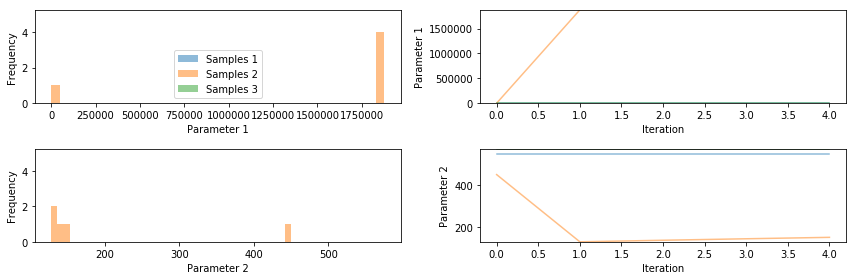

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = np.array([0.015, 500])
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)

# Create a uniform prior over the parameters
log_prior = pints.UniformLogPrior(
    [0.01, 400],
    [0.02, 600]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(100)

# Disable logging mode
mcmc.set_log_to_screen(True)
mcmc.set_log_rate(1)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

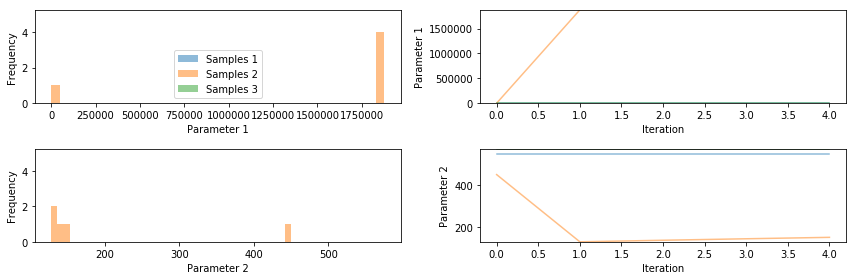

In [3]:

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
#chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
#print('R-hat:')
#print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
#pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()